# Google Colab Main Document 

This notebook is the main runs the main experiments for adverasrial attacks against the [RadioML](https://www.deepsig.ai/datasets) dataset. It is recommended that a GPU is used to run the code to reduce the amount of time it takes to generate the results. This is a good sentence. 

The environment requires the [Adversarial Robustness Toolbox](https://github.com/Trusted-AI/adversarial-robustness-toolbox) which is installed in this document. If you're running this code on a cloud node or a personal machine then you need to make sure this package is installed along with the other dependencies. One other note to take into account is that this notebook is only designed to run on Google Colab because it connects to my Google Drive. 


In [ ]:
import numpy as np 
import matplotlib.pylab as plt
from google.colab import drive
drive.mount('/content/gdrive') 

In [ ]:
%cd /content/gdrive/MyDrive/Git/adversarial-radioml/

In [ ]:
!ls

In [ ]:
!pip install -r requirements.txt

# Experiments 

- `test_exp_fgsm.py`: This script runs an experiment that evaluates different values of epsilon in the Fast Gradient Sign Method attack. The values for epsilon are `[0.01, 0.025, 0.5, ..., 0.2]`. The output is saved in a pickle file in `outputs/`
- `test_exp_multiple_attacks.py`: This script runs an experiment that generated adversarial data using FGSM, PGD and DeepFool. The output is saved in a pickle file in `outputs/`. This script is very time consuming and it is recommended that a TPU is used to accelerate the training time. 

In [ ]:
!python test_exp_fgsm.py

Train on 158400 samples, validate on 17600 samples
/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates
Epoch 1/50
2022-04-22 03:26:04.966234: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
158400/158400 [==============================] - 61s 386us/sample - loss: 2.2782 - val_loss: 2.1007
Epoch 2/50
158400/158400 [==============================] - 46s 288us/sample - loss: 2.0125 - val_loss: 1.8350
Epoch 3/50
158400/158400 [==============================] - 46s 289us/sample - loss: 1.8202 - val_loss: 1.7529
Epoch 4/50
158400/158400 [==============================] - 46s 290us/sample - loss: 1.6519 - val_loss: 1.4794
Epoch 5/50
158400/1

In [ ]:
!python test_exp_single_attack.py FastGradientMethod

In [ ]:
!python test_exp_single_attack.py DeepFool

In [ ]:
!python test_exp_single_attack.py ProjectedGradientDescent

In [ ]:
!ls outputs

<Figure size 1200x800 with 0 Axes>

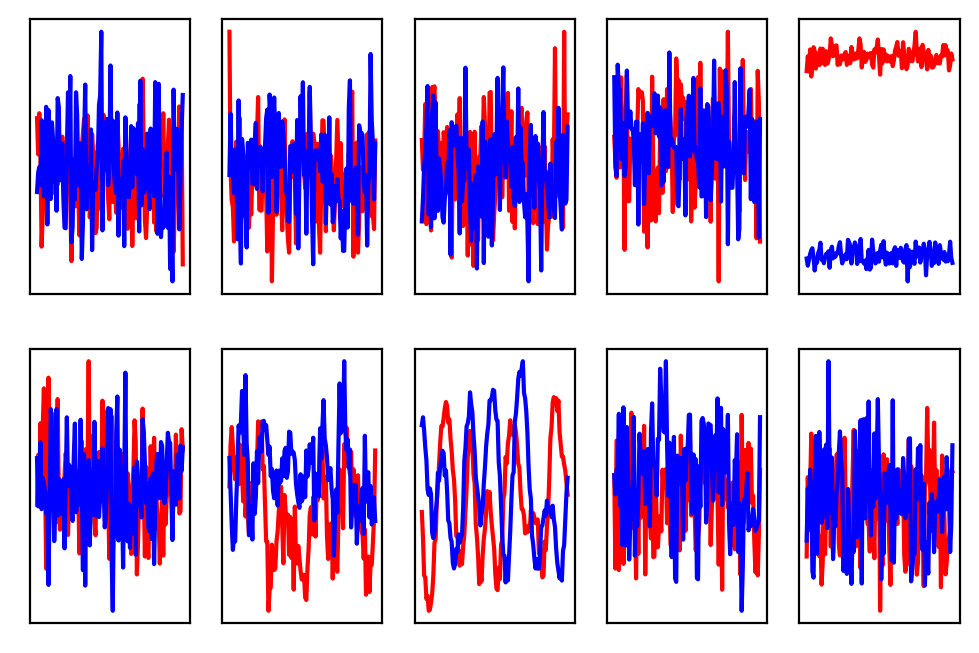

In [ ]:
# from arml.utils import load_d

plt.figure(dpi=200)
fig, axs = plt.subplots(2, 5, dpi=200)
k = 0
for j in range(10): 
    i = np.random.randint(len(X))
    x = X[i, :,:]
    if j > 4: k = 1
    axs[k, j % 5].plot(x[0, :], 'r')
    axs[k, j % 5].plot(x[1, :], 'b')
    axs[k, j % 5].xaxis.set_visible(False)
    axs[k, j % 5].yaxis.set_visible(False)
